In [159]:
from sklearn.feature_extraction.text import CountVectorizer
import pymorphy2
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk.metrics.distance import edit_distance
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

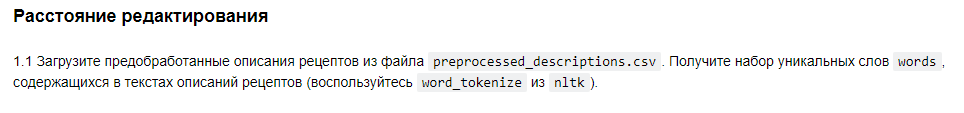

In [15]:
df = pd.read_csv('ru_recipes_sample.csv')
df

,url,name,ingredients,description
0,https://www.povarenok.ru/recipes/show/164365/,Густой молочно-клубничный коктейль,"{'Молоко': '250 мл', 'Клубника': '200 г', 'Сах...",Этот коктейль готовлю из замороженной клубники...
1,https://www.povarenok.ru/recipes/show/1306/,Рулетики,"{'Сыр твердый': None, 'Чеснок': None, 'Яйцо ку...",Быстро и вкусно.
2,https://www.povarenok.ru/recipes/show/10625/,"Салат ""Баклажанчик""","{'Баклажан': '3 шт', 'Лук репчатый': '2 шт', '...","Сытный, овощной салатик, пальчики оближете."
3,https://www.povarenok.ru/recipes/show/167337/,Куриные котлеты с картофельным пюре в духовке,"{'Фарш куриный': '800 г', 'Пюре картофельное':...",Картофельное пюре и куриные котлеты - вкусная ...
4,https://www.povarenok.ru/recipes/show/91919/,Рецепт вишневой наливки,"{'Вишня': '1 кг', 'Водка': '1 л', 'Сахар': '30...","Вишневая наливка имеет яркий вишневый вкус, ко..."
...,...,...,...,...
3462,https://www.povarenok.ru/recipes/show/54574/,Мшош,"{'Чечевица': '1 стак.', 'Лук репчатый': '2 шт'...","Для тех, кто любит чечевицу... Вам сюда! Очень..."
3463,https://www.povarenok.ru/recipes/show/113494/,Мясные треугольники с баклажаном,"{'Фарш мясной': '400 г', 'Баклажан': '1 шт', '...",Баклажановые фантазии продолжаются! Предлагаю ...
3464,https://www.povarenok.ru/recipes/show/83228/,"""Болоньез"" по-новому","{'Фарш мясной': '400 г', 'Томаты в собственном...",Мое любимое блюдо лазанья. Но кушать только фа...
3465,https://www.povarenok.ru/recipes/show/172238/,Варенье из одуванчиков с апельсинами,"{'Цветки': '400 г', 'Сахар': '1300 г', 'Апельс...",Прошлым летом варила варенье из одуванчиков по...


In [16]:
df['description'] = df['description'].apply(lambda x: word_tokenize(x))

In [19]:
arr = df['description'].values.copy()
arr1 = []
for lst in arr:
    for i in lst:
        if i.isalpha() and i not in arr1:
            arr1.append(i)

In [150]:
arr2 = []
for lst in arr:
    for i in lst:
        arr2.append(i)


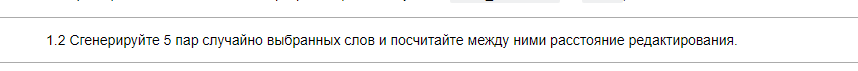

In [55]:
words1 = np.random.choice(arr1, 5)
words2 = np.random.choice(arr1, 5)
print(words1, words2)

['Земле' 'крошки' 'творог' 'отдыхающим' 'осьминогов'] ['проста' 'семейными' 'короче' 'процеженного' 'Пикантное']


In [56]:
distance = []
for i in range(5):
    distance.append(edit_distance(words1[i], words2[i]))
distance

[6, 8, 4, 11, 8]

In [57]:
distances = pd.DataFrame(data = (words1, words2, distance)).T
distances = distances.rename(columns = {0: '1st_wors', 1: '2nd_word', 2: 'distance'})

In [58]:
distances

,1st_wors,2nd_word,distance
0,Земле,проста,6
1,крошки,семейными,8
2,творог,короче,4
3,отдыхающим,процеженного,11
4,осьминогов,Пикантное,8


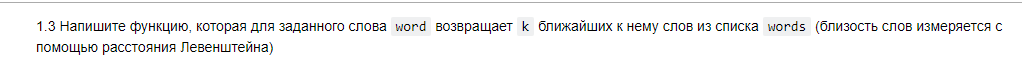

In [88]:
def knw(word, k):
    dists = np.array([])
    for i in arr1:
        dists = np.append(dists, edit_distance(word, i, substitution_cost = 2))
    dists = np.argsort(dists)[:k]
    arr2 = np.array(arr1)
    return(arr2[dists])
knw('мама', 10)

array(['мама', 'мам', 'мамам', 'маме', 'Мама', 'маша', 'Зама', 'сама',
       'Сама', 'мамы'], dtype='<U21')

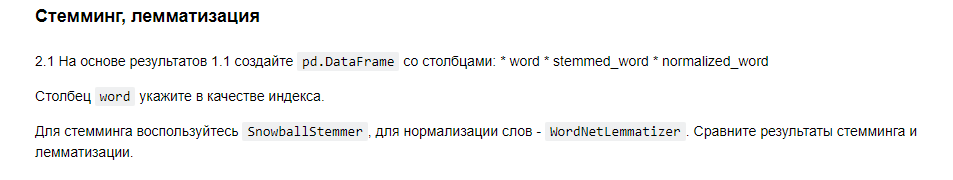

In [140]:
snb_stemmer_ru = SnowballStemmer('russian')
stemmed_word = snb_stemmer_ru.stem('мама')
morph = pymorphy2.MorphAnalyzer()
p = morph.parse('мама')
normalized_word = p[0].normal_form
df1 = pd.DataFrame(data = arr1)
df1['stemmed_word'] = df1[0].apply(lambda x: snb_stemmer_ru.stem(x))
df1['normalized_word'] = df1[0].apply(lambda x: morph.parse(x)[0].normal_form)
df1 = df1.rename(columns = {0: 'Word'})

In [141]:
df1 = df1.set_index('Word')

In [142]:
df1

,stemmed_word,normalized_word
Word,,
Этот,этот,этот
коктейль,коктейл,коктейль
готовлю,готовл,готовить
из,из,из
замороженной,заморожен,заморозить
...,...,...
сбывается,сбыва,сбываться
подружим,подруж,подружить
одинаковых,одинаков,одинаковый


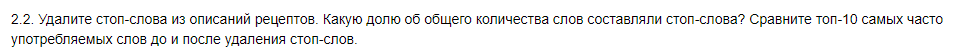

In [173]:
p = re.compile('^[а-яА-ЯёЁ*&]')
arr2 = [i for i in arr2 if p.search(i)]
ru_stop_words = stopwords.words('russian')
a = [w.lower() for w in arr2 if w.lower() not in ru_stop_words]


In [175]:
print(f'Доля стоп-слов {(len(arr2) - len(a))/ len(arr2)}')

Доля стоп-слов 0.32368831675443727


In [193]:
arr2 = [i for i in arr2 if p.search(i)]
do_ud = pd.Series(arr2)
posle_ud = pd.Series(a)
print(f'Топ-10 до удаления стоп-слов:\n{do_ud.value_counts()[:10]}')
print()
print(f'Топ-10 после удаления стоп-слов:\n{posle_ud.value_counts()[:10]}')

Топ-10 до удаления стоп-слов:
и        4822
в        2304
с        1850
на       1504
не       1427
очень    1123
из        977
я         752
что       732
для       686
dtype: int64

Топ-10 после удаления стоп-слов:
очень          1608
рецепт          869
это             733
блюдо           525
вкусный         461
просто          436
вкусно          378
приготовить     344
вкус            323
салат           313
dtype: int64
